<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: Adam Ten Hoeve

***

This assignment is due on Moodle by **5 PM on Friday November 30**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  On one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Ketelbells McKnowsNoStats. At various points in your day you catch Ketelbells making the following mistakes.  In each case, clearly explain to Ketelbells why his testing setup or conclusion is incorrect. 

**Part A**: Ketelbells has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Ketelbells wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \mu < 30$. 

***
A null hypothesis should be the default state of the data when no assumptions are being made. The alternative hypothesis is what you are trying to test about the data. We are testing whether the mean age of our customers is below 30 so that will be an alternative hypothesis. The null hypothesis should be that the mean age is 30 or $H_0: \mu = 30$ and our alternative hypothesis will be $H_1: \mu < 30$.

**Part B**: After the wonderful explanation you gave him after the previous debacle, Ketelbells has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \bar{x} = 30$.  

***
Come on Ketelbells, you know better. The point of hypothesis testing is to infer information about the the true distribution. $\bar{x}$ is our sample mean, which comes from the sample of customers we have data from, and is not the same as the true mean of the population. To be a proper hypothesis test, we will need to compare the true mean $\mu$ in our null hypothesis $H_0: \mu = 30$ and alternative hypothesis $H_1: \mu < 30$.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

***
No Ketelbells, that's not how we use p-values. A p-value tells you the smallest significance level at which the null hypothesis can be rejected. With our calculated p-value of 0.03, that means that we will reject the null at a 97% or less significance and fail to reject it at more than 97% significance.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a normalized test-statistic of $z = -0.04$ for the mean age and concludes that since $z = -0.04 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

***
Close, but probabilities can't be negative so we must've missed a step. The test statistic tells us the x-location of the normal distribution that applies to our data. To compare that to the significance, we need to find the area of the normal up to the point z = -0.04. By plugging that value into our CDF function, we get a p-value of 0.4840. $0.4840 > 0.05$ so we actually fail to reject the null.

In [24]:
stats.norm.cdf(-0.04)

0.48404656314716926

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas data frame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [25]:
dfMPG = pd.read_csv('data/auto-mpg.data',
                    sep = "\s+",
                    header = None,
                    names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "accel", "model year", "origin", "car name"])
dfMPG = dfMPG.loc[dfMPG["horsepower"] != "?"]
dfMPG = dfMPG[["mpg", "cylinders"]]
dfMPG.dropna(inplace = True)
dfMPG.head()

,mpg,cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8
4,17.0,8


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 95% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

***
If we are trying to conclude that the average gas mileage is higher than 20 mpg, then our null hypothesis is $H_0: \mu = 20$ and our alternative hypothesis is $H_1: \mu_0 > 20$. To see if our data rejects this null, we can use a 95% confidence interval using the equation:
$$ CI: \bar{x} \pm z_{\alpha/2}*\dfrac{s}{\sqrt{(n)}} $$

We can calculate $z_{\alpha/2} = 1.96$.From our data we can pull the following numbers:
$
\bar{x} \approx 23.5285
n = 397
s \approx 7.8111
$

Plugging these values into our equation we get:

$$ \boxed{ CI: \bar{x} \pm z_{\alpha/2}*\dfrac{s}{\sqrt{(n)}} = 23.5285 \pm 1.96 * \dfrac{7.8111}{\sqrt{(397)}}  = [22.6742, 24.2176] }$$

Our confidence interval does not contain the 20 mpg null hypothesis. With 95% confidence, we can reject the null and can conclude that the true mean gas mileage is above 20 mpg.

In [4]:
n = len(dfMPG) # Number of samples n
xbar = np.mean(dfMPG["mpg"]) # Sample mean of mpg
zAlpha = stats.norm.ppf(1 - 0.025) # Significance Level
s = np.std(dfMPG["mpg"]) # Sample Standard Deviation

print(n, xbar, zAlpha, s)

lower = xbar - zAlpha * s / math.sqrt(n)
upper = xbar + zAlpha * s / math.sqrt(n)
CI = [lower, upper]
print(CI)

392 23.44591836734694 1.959963984540054 7.795045762682584
[22.6742623863839, 24.21757434830998]


**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

***
We can solve this with a p-value! Let $\mu_1$ be the mean mileage of the 4 or 6 cylinder engines and $\mu_2$ be the average mileage of the 8 cylinder engines. Then we can set our null and altenative hypotheses:  
$H_0: \mu_{4+6} - \mu_8 = 10$  
$H_1: \mu_{4+6} - \mu_8 > 10$

We can use the following formula to solve for z. Note that $\sigma_{4+6}$ and $\sigma_8$ are the standard deviations, and $m$ and $n$ are the lengths, of the 4 or 6 cylinder data set and the 8 cylinder data set respectively.  
$z = \dfrac{\mu_{4+6} - \mu_8 - 10}{\sqrt{\frac{\sigma_{4+6}^2}{m} + \frac{\sigma_8^2}{n}}}$


Plug in the goodies!  
$z = \dfrac{26.544 - 14.963 - 10}{\sqrt{\frac{6.697^2}{282} + \frac{2.822^2}{103}}} \approx 3.2509$

Then calculate the p-value from the area of the z.  
p-value: $\boxed{1 - \phi(z) = 1 - \phi(3.3891) \approx 0.00058 }$

Because 0.00058 < 0.01, we reject the null hypothesis and can conclude that, at the 0.01 signifcance level, the 4 or 6 cylinder engines are, on average, more than 10 mpg better than the 8 cylinder engines.

In [5]:
df4or6 = dfMPG.loc[(dfMPG["cylinders"] == 4) | (dfMPG["cylinders"] == 6)]
df8 = dfMPG.loc[dfMPG["cylinders"] == 8]

m = len(df4or6)
n = len(df8)
mu1 = np.mean(df4or6["mpg"])
mu2 = np.mean(df8["mpg"])
sigma1 = np.std(df4or6["mpg"])
sigma2 = np.std(df8["mpg"])
c = 10

z = (mu1 - mu2 - c) / math.sqrt((sigma1**2/m) + (sigma2**2/n))
print(mu1, mu2, sigma1, sigma2, m, n, z)

1 - stats.norm.cdf(z)

26.543617021276596 14.963106796116508 6.696557152544801 2.822482219926014 282 103 3.2509186574762086


0.0005751638223314703

**Part D**: You decide to go with either a 4 or 6 cylinder engine, because if you buy an 8-cylinder vehicle that can haul heavy things, you just know you are going to get stuck helping people move. You just _know_ it.

Conduct an appropriate hypothesis test at the $\alpha=0.01$ significance level to determine if the mean gas mileage of vehicles with a 4-cylinder engine is significantly better than the gas mileage of vehicles with 6 cylinders. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

***
To test whether the 4 cylinder engines get better gas mileage than the 6 cylinder engines, we can use the following hypothesis:
Null Hypothesis $H_0: \mu_4 - \mu_6 = 0$  
Alternative Hypothesis $H_1: \mu_4 - \mu_6 > 0$

Using a p-test, we got a p-value of approximately 0.0 (so tiny that it rounded to zero), which is less than the $\alpha = 0.01$ significance level. Similarly, we also found a confidence interval on $[9.2914, 9.3294]$, which does not contain zero. Both of these results indicate that we should reject the null hypothesis. Therefor, there is statisical signicifance showing that the 4 cylinder engines have a better average gas mileage than 6 cylinder engines.

In [6]:
df4 = df4or6.loc[df4or6["cylinders"] == 4]
df6 = df4or6.loc[df4or6["cylinders"] == 6]

mu1 = np.mean(df4["mpg"])
sigma1 = np.std(df4["mpg"])
m = len(df4)

mu2 = np.mean(df6["mpg"])
sigma2 = np.std(df6["mpg"])
n = len(df6)

z = (mu1 - mu2) / math.sqrt((sigma1**2/m) + (sigma2**2/n))
print(mu1, mu2, sigma1, sigma2, m, n, z)

print("pval", 1 - stats.norm.cdf(z))

CI = [mu1-mu2-0.025*math.sqrt(math.sqrt((sigma1**2/m) + (sigma2**2/n))), mu1-mu2+0.025*math.sqrt(math.sqrt((sigma1**2/m) + (sigma2**2/n)))]
print(CI)

29.283919597989957 19.973493975903615 5.6562806034436 3.805673771143994 199 83 16.07955348305829
pval 0.0
[9.291402237675493, 9.32944900649719]


---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute 95% t-confidence intervals for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

***
Using the code below, we constructed the following confidence intervals for the reaction times:  
Coffee+Nap: $[428.48, 474.12]$  
Coffee: $[465.87, 522.53]$  
Nap: $[460.47, 525.13]$  

1. All of the confidence intervals overlap, pairwise, so we can not make any definitive conclusions about which group leads to faster reaction times.
2. We use a t-distribution because we know that the mean reaction time is normally distributed and we only have 10 samples for each group, so we can not use the Central Limit Theorem and instead use a T-distribution.

In [7]:
def ConfInterval(xbar, alpha, s, n):
    t = stats.t.ppf(alpha/2, n-1)
    lower = xbar + (t * s / math.sqrt(n))
    upper = xbar - (t * s / math.sqrt(n))
    return np.array([lower, upper])

In [8]:
meanCofNap = 451.3
meanCof = 494.2
meanNap = 492.8

stdCofNap = 31.9
stdCof = 39.6
stdNap = 45.2

n = 10
alpha = 0.05

CICofNap = ConfInterval(meanCofNap, alpha, stdCofNap, n)
CICof = ConfInterval(meanCof, alpha, stdCof, n)
CINap = ConfInterval(meanNap, alpha, stdNap, n)

print("The CI for coffee and a nap is: {}".format(CICofNap))
print("The CI for only coffee is: {}".format(CICof))
print("The CI for only a nap is: {}".format(CINap))

The CI for coffee and a nap is: [428.4801147 474.1198853]
The CI for only coffee is: [465.87186652 522.52813348]
The CI for only a nap is: [460.46586785 525.13413215]


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

***
Let's do a p-test for the difference between the means! This will tell us how likely we are to see the test statistic under the assumption that the null hypothesis is true. Note that a faster reaction time means that the average value will be less than a slower reaction time. Therefor our hypethsis are:  
$H_0: \mu_{Coffee} - \mu_{Nap} = 0$  
$H_1: \mu_{Coffee} - \mu_{Nap} > 0$  

Because we only have 10 data points, we can't use the Central Limit Theorem, so instead we need to use the t-distribution. Then we can plug in and solve the following equation:
$$ t = \frac{\bar{x}_{Coffee} - \bar{x}_{Nap}}{\frac{s_{Coffee}^2}{m}+\frac{s_{Nap}^2}{n}} = \frac{494.2 - 492.8}{\frac{39.6^2}{10}+\frac{45.2^2}{10}}\approx 0.2364$$

Then solving for the p-value from our t:  
$$\boxed{\text{p-value } = 1 - t(0.2364) \approx 0.4710}$$

0.4710 > 0.05 so we fail to reject the null hypothesis at the 95% significance level. Therefore, we can not conclude that naps promote faster reaction times than drinking coffee.

In [9]:
t = (meanCof - meanNap) / math.sqrt(stdNap**2/n + stdCof**2/n)
pval = 1 - stats.t.cdf(t, n+n-2)
pval

0.47104196659710473

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

***
The process for solving this is similar to **Part B**. However, we should note that because we found in **Part B** that the results of taking a nap or drinking coffee are not statistically different, we can perform one hypothesis test that will check the coffee + nap against both data sets.  
$H_0: \mu_{Coffee} - \mu_{Coffee+Nap} = 0$  
$H_1: \mu_{Coffee} - \mu_{Coffee+Nap} > 0$

By finding another p-value, again using the t-distribution, we get the p-value $\boxed {p \approx 0.0078}$. Because $0.0078 < 0.05$, we reject the null hypothesis. Therefor there is statistically sufficient evidence to conclude that coffee-nap breaks lead to faster reaction times than just taking a nap or just drinking coffee.

In [10]:
n = 10
t = (meanCof - meanCofNap) / math.sqrt((stdCofNap**2/n) + (stdCof**2/n))
pval = 1 - stats.t.cdf(t, n + n - 2)
pval

0.007842570445960817

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

***
In order to make inferences based on the standard deviation, we need to use the $\chi^2$ distribution. We can solve for a Confidence Interval for the standard deviation using the equation:
$$ CI: \Big[ \sqrt{\dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2,\nu}}}, \sqrt{\dfrac{(n-1)s^2}{\chi^2_{\alpha/2,\nu}}} \Big] $$

From the above table, we can get the values:
$n = 10$  
$\nu = n - 1= 9$  
$s^2 \approx 1017.61$  
$\alpha = 0.05$

If we plug in our values into the $\chi^2$ distrubition we get:  
$\chi^2_{0.975, 9} \approx 108.937$  
$\chi^2_{0.025, 9} \approx 58.845$

From there, we can solve for our confidence interval:
$\boxed{CI: [27.6764, 37.6569]}$

In [11]:
nu = n - 1
s2 = stdCofNap ** 2
print(s2)
lowerChi = stats.chi2.ppf(0.975, nu)
upperChi = stats.chi2.ppf(0.025, nu)
print(lowerChi)
print(upperChi)

lower = math.sqrt(nu * s2 / lowerChi)
upper = math.sqrt(nu * s2 / upperChi)
CI = [lower, upper]
CI

1017.6099999999999
19.02276779864163
2.700389499980358


[21.94194309529309, 58.23696482237441]

---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [12]:
localPath = "data/pootef.csv"
dfPootef = pd.read_csv(localPath, delimiter = ",")
# dfPootef.dropna(inplace = True)
dfPootef.head()

,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
1,1,NaN,40,37
2,1,NaN,40,35
3,1,NaN,40,35
4,1,Oct 5 2018,40,36


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$. 

***
Nefaria is testing whether her feeding regimen is better than the standard diet, so the alternate hypothesis should be larger than the null hypothesis.

$H_0: \mu = 0.9$  
$H_1: \mu > 0.9$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.01$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement?   

***
To start out, we should find our proportions. Our $p_0$ is the probablity of the null hypothesis which is means $p_0 = 0.9$. $\hat{p} = \frac{n_{eaten}}{n_{total}} \approx 0.9022.

Now with our proportions, we can perform a p-value test by using the following equations:

$$\hat{\sigma} = \sqrt{\frac{p_0(1 - p_0)}{n}}$$

$$z = \dfrac{\hat{p} - p_0}{\hat{\sigma}}$$

$$\text{p-val } = 1 - \phi(z) \text{ because the alternative hypothesis is }\mu > 0.9.$$

Using the calculations below, we find that the p-value for the data is about $0.3013$. This is greater than our significance level $\alpha = 0.01$ so Nefaria fails to reject the null hypothesis. This means that her feeding regimine was not a statistically significant improvement over the standard feeding regimine.

In [23]:
p0 = 0.9
n = len(dfPootef)
phat = np.sum(dfPootef["Ate"])/np.sum(dfPootef["Fed"])
s = math.sqrt(p0 * (1 - p0) / np.sum(dfPootef["Fed"])) # Use the sum because each 'n' is reall 40 data points
z = (phat - p0) / s
pval = 1 - stats.norm.cdf(z)
pval

0.30131168747623693

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.01$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [14]:
p0 = 0.9
for i in range(1, 4+1):
    dfClean = dfPootef.loc[dfPootef["Group"] == i]
    n = len(dfClean)
    phat = np.sum(dfClean["Ate"])/np.sum(dfClean["Fed"])
    s = math.sqrt(p0 * (1-p0) / np.sum(dfClean["Fed"])) # Use the sum because each "n" is really 40 data points.
    z = (phat - p0) / s
    pval = 1 - stats.norm.cdf(z)
    print("The pval for group {} is {:0.4f}".format(i, pval))

dfNoNaN = dfPootef.dropna()
print("After Cleaning:")
for i in range(1, 4+1):
    dfClean2 = dfNoNaN.loc[dfNoNaN["Group"] == i]
    n = len(dfClean2)
    phat = np.sum(dfClean2["Ate"])/np.sum(dfClean2["Fed"])
    s = math.sqrt(p0 * (1-p0) / np.sum(dfClean2["Fed"])) # Use the sum because each "n" is really 40 data points.
    z = (phat - p0) / s
    pval = 1 - stats.norm.cdf(z)
    print("The pval for group {} is {:0.4f}".format(i, pval))

The pval for group 1 is 0.5377
The pval for group 2 is 0.0115
The pval for group 3 is 0.6475
The pval for group 4 is 0.7756
After Cleaning:
The pval for group 1 is 0.6039
The pval for group 2 is 0.0019
The pval for group 3 is 0.8333
The pval for group 4 is 0.9359


Use right and proper statistical techniques, we have discovered that there is a significant improvement in the feeding regimens! All Nefaria had to do was clean the data to remove all the dates with NaN and only look at group 2. By doing so, we are able to get a p-value of $0.0019 < 0.01$ so she can reject the null and assert that her feeding regimen was better. So long as she ignores the fact that all the other groups had much higher p-values that would fail to reject the null.

---
[Back to top](#top)
<a id='p5'></a>

### [20 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

[Usain O'Flaherty](https://www.youtube.com/watch?v=LVeLz0FIj9A), the famous octopus athlete of the distinguished O'Flaherty family, has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [15]:
dfTreats = pd.read_csv("data/icecream.csv")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

***
To solve our linear regressions we will need to use the equations for $\hat{\beta}$ and $\hat{\alpha}$.
$$\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$$

$$\hat{\beta} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$$

From our Simple Linear Regression and the calculations belwo, we get a best fit line that follows $\boxed{ Y = 2.8805 + 0.4155x }$.

In [16]:
xbar = np.mean(dfTreats["miles"])
ybar = np.mean(dfTreats["scoops"])

betahat = np.sum((dfTreats["miles"] - xbar) * (dfTreats["scoops"] - ybar)) / np.sum((dfTreats["miles"] - xbar)**2)

alphahat = ybar - (betahat * xbar)

print("Beta is {:0.4f}".format(betahat))
print("Alpha is {:0.4f}".format(alphahat))

Beta is 0.4155
Alpha is 2.8805


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

In [17]:
# Returns the corresponding yhat value for any x value.
def SLR(x):
    return alphahat + (betahat * x)

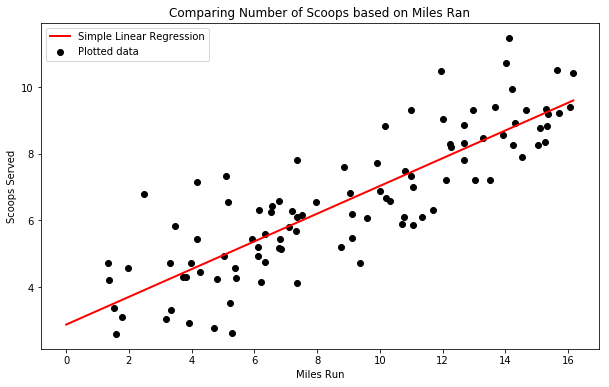

In [18]:
fig,ax = plt.subplots(1, 1, figsize = (10,6))
# Plot the points
ax.scatter(x = dfTreats["miles"], y = dfTreats["scoops"], color = "black", label = "Plotted data")

# Plot the linear regression line.
xaxis = np.linspace(0, dfTreats["miles"].max(), 50)
yaxis = SLR(xaxis)
ax.plot(xaxis, yaxis, linewidth = 2, color = "red", label = "Simple Linear Regression")

# Make it pretty
ax.set_xlabel("Miles Run")
ax.set_ylabel("Scoops Served")
ax.set_title("Comparing Number of Scoops based on Miles Ran")
ax.legend();

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

***
$\hat{\alpha}$ represents how much ice cream Usain would eat if he didn't run at all. $\hat{\beta}$ represents the additional amount of ice cream he will consume given that he ran some amount of miles. Because $\hat{\beta}$ is positive in the model, there is a positive relationship between miles ran and quantity of ice cream consumed. As he runs more miles, he will eat more ice cream.

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [19]:
SLR(26.2)

13.767445170097927

Based on our model, Usain would consume $\boxed{13.7674}$ scoops of icecream if they ran a marathon. That's a lot of ice cream. Our model assumes a linear relationship between miles and scoops, which is unrealistic given that there is a limit to the amount of ice cream an octopus can physically eat (it doesn't account for stomach size or stomach aches). Another drawback is that it doesn't account for other variables such as weather and willpower, which results in more error in the model.

**Part E:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result.

***
To calculate the confidence interval we should use the equation:
$$\text{CI: } \hat{\beta} \pm t_{\alpha/2, n-2}*SE(\hat{\beta})$$

We can sovle for $SE(\hat{\beta})$ using the equation:
$$SE(\hat{\beta}) = \frac{\hat{\sigma}}{\sqrt{\sum_{i = 1}^{n}(x_i - \bar{x})^2}}$$

And we can get the Standard Deviation of the slope from:
$$ \hat{\sigma} = \sqrt{\dfrac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{n-2}}$$

From the equations, we did the calculations below and found that $\hat{\beta}$ has a confidence interval of $\boxed{[0.3812, 0.4499]}$.

In [20]:
alpha = 0.34
yhat = SLR(dfTreats["miles"]) # I made this function in Part B
SSE = np.sum((dfTreats["scoops"] - yhat)**2)
SE = np.sqrt((SSE/(len(dfTreats)-2)) / np.sum((dfTreats["scoops"] - xbar)**2))
t = stats.t.ppf(alpha/2, len(dfTreats)-2)

lower = betahat - (t*SE)
upper = betahat + (t*SE)
CI = [upper, lower]
CI

[0.3811984205557647, 0.44986782934559044]

**Part F**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

***
Other features that could be added to the model include:
* Temperature: If Usain ran on a cold day then he would probably eat less ice cream than on a warm day.
* Calories Eaten Before Run: If Usain O'Flaherty ate different amount of food before each run, then that may affect how many scoops of ice cream he would've eaten.
* Calories Burned During Run: If Usain runs different routes each times, then he could burn different amounts of calories based on the type of terrain, the steepness of the trail, and so on. This could affect how much ice cream he ate after the run.